In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 50
pd.set_option('max_columns', 50)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
sns.set(style='ticks', context='talk')
sns.set(rc={"figure.figsize": (10, 10)})

More magic:
  
`%alias_magic t time`<br>
`?str.replace()`<br>
`%run ./two-histograms.ipynb`<br>
`!ls`<br>
`%lsmagic`<br>

Also https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

In [3]:
import json
path = 'datasets/bitly_usagov/example.txt'
records = [json.loads(line) for line in open(path)]

# 14.1 Counting Time Zones in Pure Python

In [4]:
frame = pd.DataFrame(records)
del frame['_heartbeat_']
frame.head()

,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


In [5]:
top_zones = frame.tz.value_counts().head(10)
top_zones


America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

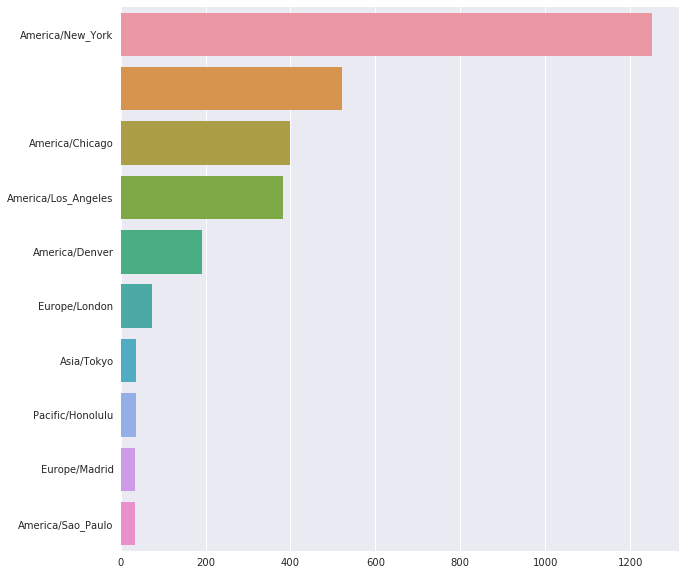

In [6]:
sns.barplot(x=top_zones.values, y=top_zones.index);

In [7]:
cframe = frame.copy()
cframe['os'] = np.where(frame.a.str.contains('Windows'), 'Windows', 'Not Windows')
g = cframe.groupby(['tz', 'os']).size().unstack().fillna(0)
g.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


In [8]:
g.sum(axis=1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [9]:
g2 = g.copy()
g2['total'] = g2.sum(axis=1)
g2 = g2.sort_values('total', ascending=False)
g2 = g2.stack()
g2.name = 'total'
g2 = g2.reset_index()
g2 = g2[g2.os != 'total']
g2.head(10)

,tz,os,total
0,America/New_York,Not Windows,339.0
1,America/New_York,Windows,912.0
3,,Not Windows,245.0
4,,Windows,276.0
6,America/Chicago,Not Windows,115.0
7,America/Chicago,Windows,285.0
9,America/Los_Angeles,Not Windows,130.0
10,America/Los_Angeles,Windows,252.0
12,America/Denver,Not Windows,132.0
13,America/Denver,Windows,59.0


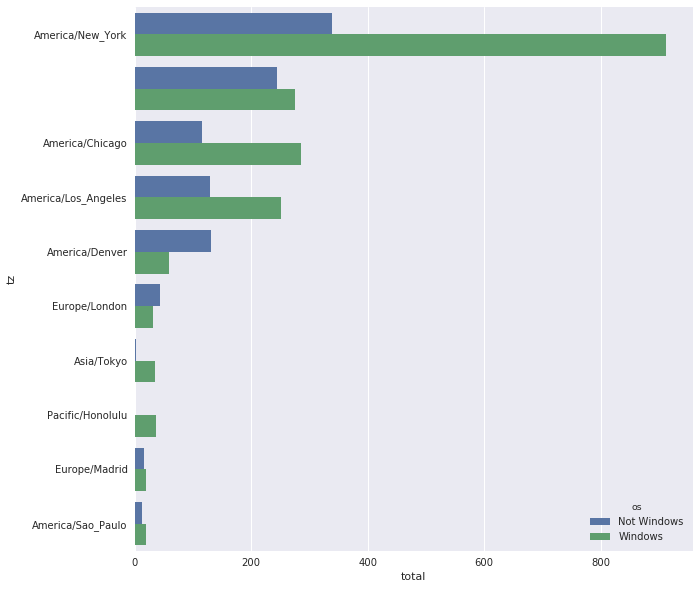

In [10]:
sns.barplot(x='total', y='tz', hue='os', data=g2.head(20));

# 14.2 MovieLens 1M Dataset

In [11]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('datasets/movielens/users.dat', sep=r'::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('datasets/movielens/ratings.dat', sep=r'::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('datasets/movielens/movies.dat', sep=r'::', header=None, names=mnames, engine='python')

In [12]:
users.head()
ratings.head()
movies.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
data = pd.merge(pd.merge(users, ratings), movies)
data.head()
data.tail()

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
1000204,5949,M,18,17,47901,2198,5,958846401,Modulations (1998),Documentary
1000205,5675,M,35,14,30030,2703,3,976029116,Broken Vessels (1998),Drama
1000206,5780,M,18,17,92886,2845,1,958153068,White Boys (1999),Drama
1000207,5851,F,18,20,55410,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western
1000208,5938,M,25,1,35401,2909,4,957273353,"Five Wives, Three Secretaries and Me (1998)",Documentary


In [14]:
data[['title', 'gender', 'rating']].groupby(['title', 'gender']).mean().unstack().head()

rating          
gender                                F         M
title                                            
$1,000,000 Duck (1971)         3.375000  2.761905
'Night Mother (1986)           3.388889  3.352941
'Til There Was You (1997)      2.675676  2.733333
'burbs, The (1989)             2.793478  2.962085
...And Justice for All (1979)  3.828571  3.689024

In [15]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
mean_ratings.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [16]:
ratings_by_title = data.groupby('title').size()
ratings_by_title.head()

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [17]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles.to_frame().head()

,title
title,
"'burbs, The (1989)","'burbs, The (1989)"
10 Things I Hate About You (1999),10 Things I Hate About You (1999)
101 Dalmatians (1961),101 Dalmatians (1961)
101 Dalmatians (1996),101 Dalmatians (1996)
12 Angry Men (1957),12 Angry Men (1957)


In [18]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings.head()

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


In [19]:
mean_ratings.sort_values('F', ascending=False).head(10)

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [20]:
mean_ratings['diff'] = mean_ratings.M - mean_ratings.F
sorted_by_diff = mean_ratings.sort_values('diff')
sorted_by_diff.head()

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777


In [21]:
sorted_by_diff.head(10)

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [22]:
sorted_by_diff.tail(10)

gender,F,M,diff
title,,,
For a Few Dollars More (1965),3.409091,3.953795,0.544704
Caddyshack (1980),3.396135,3.969737,0.573602
Rocky III (1982),2.361702,2.943503,0.581801
"Hidden, The (1987)",3.137931,3.745098,0.607167
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
"Longest Day, The (1962)",3.411765,4.031447,0.619682
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359


In [23]:
std_rating = data.groupby('title')['rating'].std()
std_rating.head()

title
$1,000,000 Duck (1971)           1.092563
'Night Mother (1986)             1.118636
'Til There Was You (1997)        1.020159
'burbs, The (1989)               1.107760
...And Justice for All (1979)    0.878110
Name: rating, dtype: float64

In [24]:
std_rating[active_titles].sort_values(ascending=False).head(10)

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

# 14.3 US Baby Names 1880–2010

In [25]:
names1880 = pd.read_csv('datasets/babynames/yob1880.txt', names=['name', 'sex', 'births'])
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [26]:
names1880.groupby('sex').sum().head()

,births
sex,
F,90993
M,110493


In [27]:
pieces = []
for year in range(1880, 2011):
    path = 'datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=['name', 'sex', 'births'])
    frame['year'] = year
    pieces.append(frame)
names = pd.concat(pieces, ignore_index=True)
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [28]:
names.shape

(1690784, 4)

In [29]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc='sum')
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


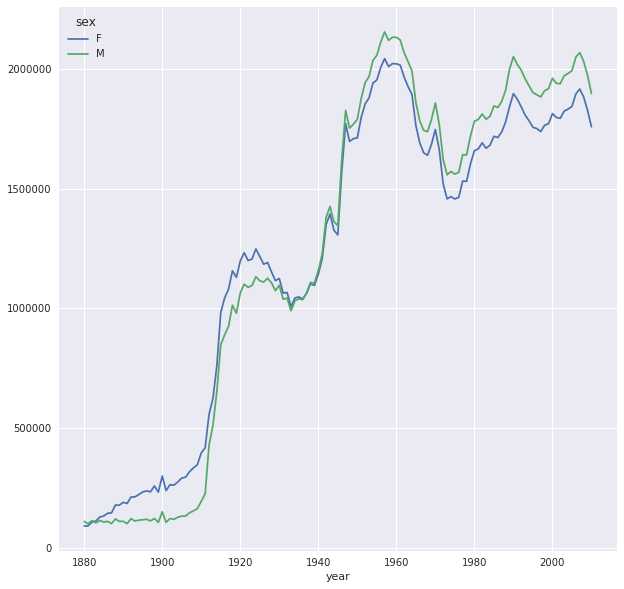

In [30]:
total_births.plot();

In [31]:
def add_prop(group):
    group['prop'] = names.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [32]:
names.groupby(['year', 'sex']).prop.sum().head()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
Name: prop, dtype: float64

In [33]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000 = top1000.reset_index(drop=True)
top1000.head()
top1000.tail()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


,name,sex,births,year,prop
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102
261876,Maxton,M,193,2010,0.000102


In [34]:
top1000.shape
names.shape

(261877, 5)

(1690784, 5)

In [35]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [36]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc='sum')
total_births.head()

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,Abbigail,Abbott,Abby,Abdiel,Abdul,Abdullah,Abe,Abel,Abelardo,Abigail,Abigale,Abigayle,Abner,Abraham,Abram,...,Zenia,Zennie,Zeno,Zenobia,Zeta,Zetta,Zettie,Zhane,Zigmund,Zillah,Zilpah,Zilpha,Zina,Zion,Zita,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,NaN,NaN,6.0,NaN,NaN,NaN,50.0,9.0,NaN,12.0,NaN,NaN,27.0,81.0,21.0,...,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,NaN,NaN,7.0,NaN,NaN,NaN,36.0,12.0,NaN,8.0,NaN,NaN,30.0,86.0,30.0,...,NaN,NaN,NaN,6.0,NaN,7.0,NaN,NaN,NaN,7.0,9.0,6.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,11.0,NaN,NaN,NaN,50.0,10.0,NaN,14.0,NaN,NaN,32.0,91.0,25.0,...,NaN,NaN,NaN,7.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,NaN,NaN,NaN,NaN,NaN,NaN,43.0,12.0,NaN,11.0,NaN,NaN,27.0,52.0,20.0,...,NaN,NaN,6.0,5.0,NaN,15.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,NaN,NaN,6.0,NaN,NaN,NaN,45.0,14.0,NaN,13.0,NaN,NaN,33.0,67.0,29.0,...,NaN,NaN,NaN,NaN,NaN,10.0,9.0,NaN,NaN,NaN,NaN,6.0,7.0,NaN,11.0,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN


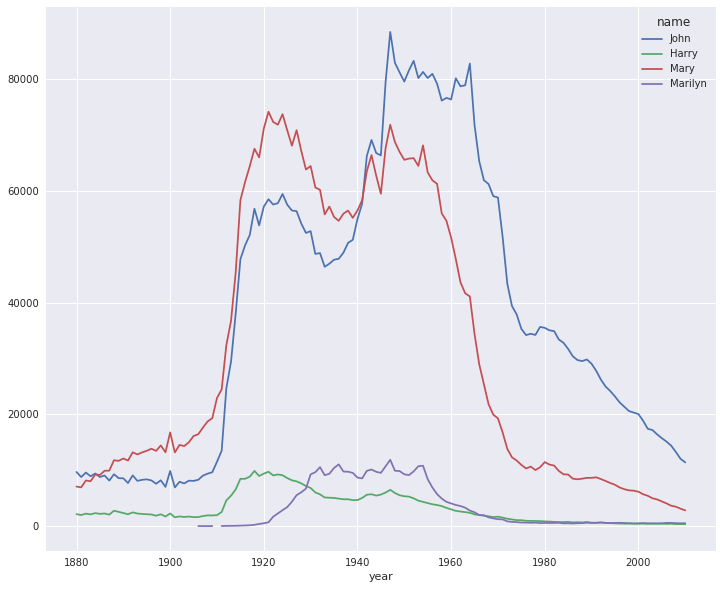

In [37]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(figsize=(12, 10), subplots=False);

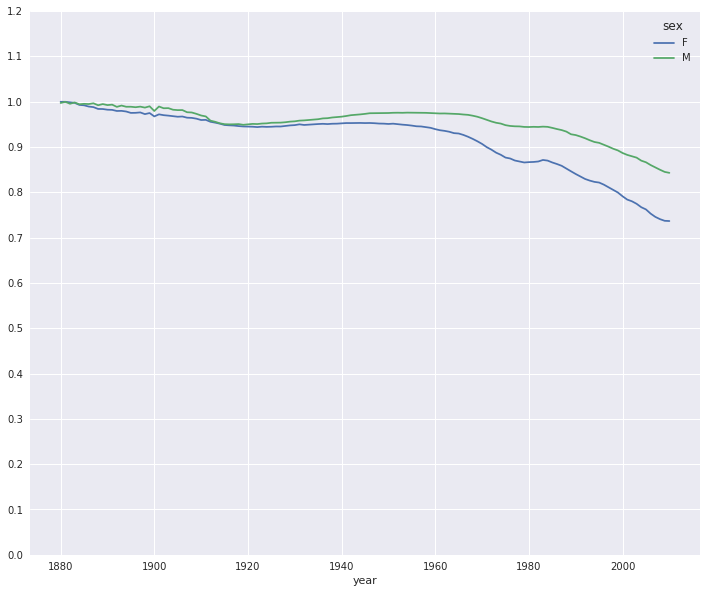

In [38]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc='sum')
table.plot(yticks=np.linspace(0, 1.2, 13), figsize=(12, 10));

In [39]:
df = boys[boys.year == 2010]
prop_cumsum = df.sort_values('prop', ascending=False).prop.cumsum()
prop_cumsum.head()
prop_cumsum.values.searchsorted(0.5)

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
Name: prop, dtype: float64

116

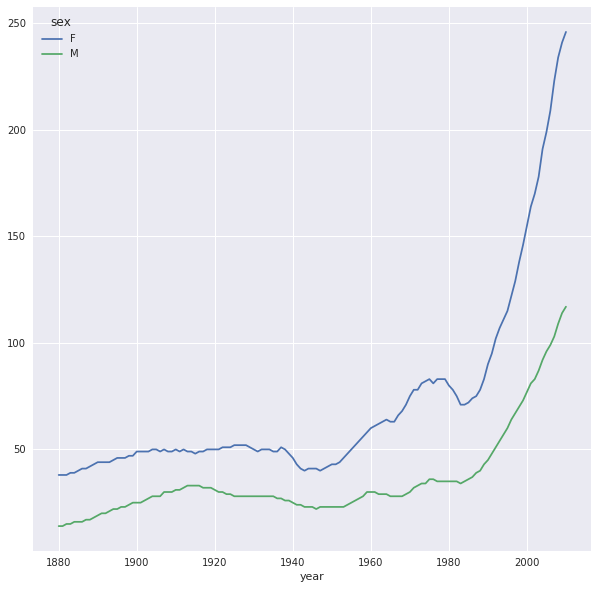

In [40]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values('prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity.unstack().plot();

In [41]:
last_letters = names.name.map(lambda x: x[-1])
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc='sum')
table.head()

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   

sex                                                                         \
year            1887     1888     1889     1890     1891     1892     1893   
last_letter                                                                  
a            48942.0  59442.0  58631.0  62313.0  60582.0  68331.0  67821.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
d             1027.0   1298.0   1374.0   1438.0   1512.0   1775.0   1821.0   
e            54353.0  66750.0  66663.0  70948.0  67750.0  77186.0  76455.0   

sex                                                                          \
year            1894     1895     1896     1897     1898     1899      1900   
last_letter                                                                   
a            70631.0  73002.0  73584.0  72148.0  79150.0  70712.0   89934.0   
b                NaN      NaN      NaN      NaN      NaN      NaN       NaN   
c                NaN      NaN      5.0      NaN      NaN      NaN       NaN   
d             1985.0   2268.0   2372.0   2455.0   2953.0   3028.0    3670.0   
e            79938.0  83875.0  84355.0  82783.0  91151.0  81395.0  107080.0   

sex                                                ...            M            \
year            1901     1902     1903     1904    ...         1986      1987   
last_letter                                        ...                          
a            72186.0  77816.0  77130.0  80201.0    ...      44776.0   47522.0   
b                NaN      NaN      NaN      NaN    ...      16479.0   17731.0   
c                NaN      NaN      NaN      NaN    ...      27177.0   27963.0   
d             3146.0   3499.0   3844.0   4260.0    ...     108526.0  107076.0   
e            83223.0  92643.0  90666.0  94631.0    ...     125673.0  126461.0   

sex                                                                      \
year             1988      1989      1990      1991      1992      1993   
last_letter                                                               
a             50337.0   54098.0   52158.0   50977.0   47271.0   45592.0   
b             19708.0   23123.0   27942.0   32179.0   32837.0   35817.0   
c             28099.0   27549.0   28951.0   28259.0   27252.0   26423.0   
d            105127.0  105727.0  101968.0   93858.0   87586.0   82541.0   
e            130176.0  139160.0  146489.0  146218.0  149738.0  147895.0   

sex                                                                      \
year             1994      1995      1996      1997      1998      1999   
last_letter                                                               
a             44441.0   44991.0   42739.0   41458.0   41281.0   40608.0   
b             38226.0   40717.0   42791.0   46177.0   50330.0   50051.0   
c             26912.0   26330.0   26270.0   25848.0   26624.0   26160.0   
d             77163.0   72313.0   70157.0   69036.0   67683.0   65507.0   
e            145682.0  140838.0  142438.0  141857.0  144854.0  145047.0   

sex                                                                      \
year             2000      2001      2002      2003      2004      2005   
last_letter                                                               
a             40837.0   39124.0   38815.0

In [42]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [43]:
letter_prop = subtable / subtable.sum()
letter_prop.head()

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959

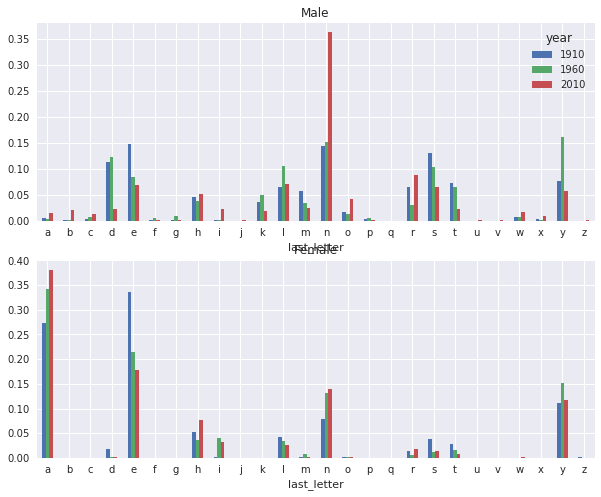

In [44]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male');
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False);

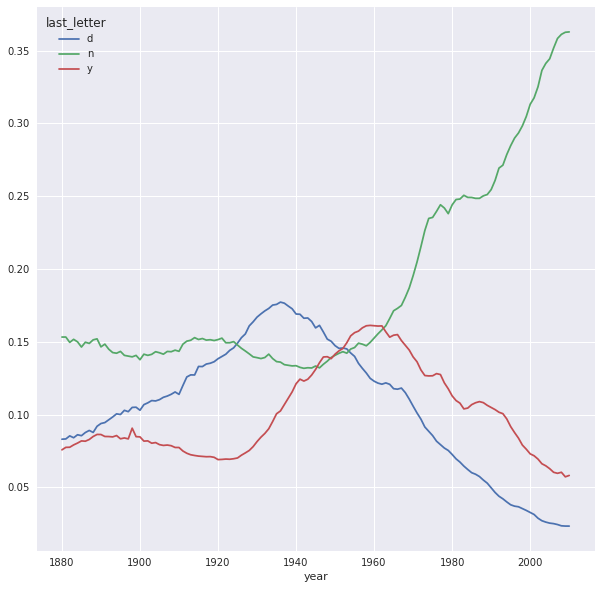

In [45]:
full_prop = table / table.sum()
t = full_prop.loc[['d', 'n', 'y'], 'M'].T
t.head()
t.plot();

In [46]:
all_names = pd.Series(top1000.name.unique())
all_names.head()

0         Mary
1         Anna
2         Emma
3    Elizabeth
4       Minnie
dtype: object

In [47]:
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [48]:
t = top1000
t = t[t.name.isin(lesley_like)]
t.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

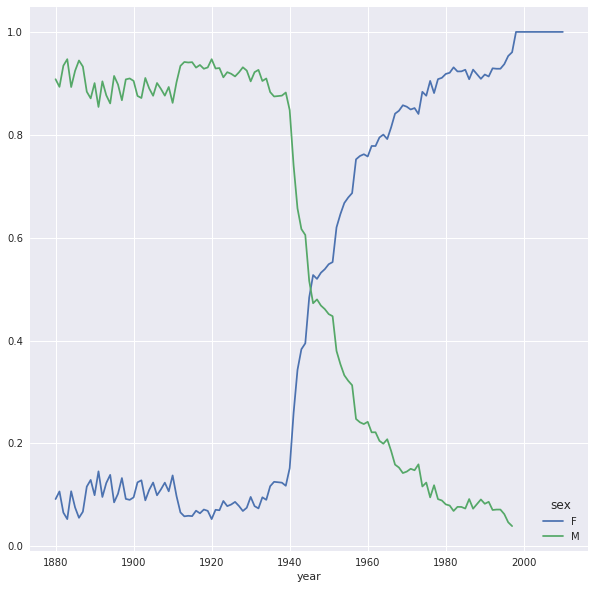

In [49]:
p = t.pivot_table('births', index='year', columns='sex', aggfunc='sum')
p = p.div(p.sum(1), axis=0)
p.head()
p.plot();